## 算法步骤

![jupyter](./吉布斯算法.png)

## 算例验证

![jupyter]('C://Users//11591//Desktop//吉布斯算例.png')

In [13]:
from scipy.stats import multivariate_normal
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# 创建二维正太分布对象, 该分布为最终的平稳分布
samplesource = multivariate_normal(mean=[5, -1], cov=[[1, 1], [1, 4]])

In [7]:
def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

In [8]:
def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

In [9]:
N1 = 10000  # 燃烧期
N2 = 1000  # 需要样本数
x_res = []
y_res = []
z_res = []
m1 = 5  # 均值1
m2 = -1  # 均值2
s1 = 1  # 方差1
s2 = 2  # 方差2
rho = 0.5
y = m2  # 给y一个初始值

In [10]:
for i in range(N1 + N2):
    x = p_xgiveny(y, m1, m2, s1, s2)  # y给定得到x的采样
    y = p_ygivenx(x, m1, m2, s1, s2)  # x给定得到y的采样
    z = samplesource.pdf([x, y])  # 采样的x和y对应的概率密度函数值
    x_res.append(x)
    y_res.append(y)
    z_res.append(z)

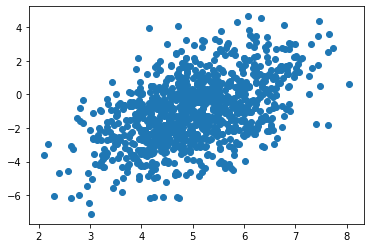

In [11]:
# 查看燃烧期后的采样样本是否符合平稳分布
plt.scatter(x_res[10000:], y_res[10000:])
plt.show()

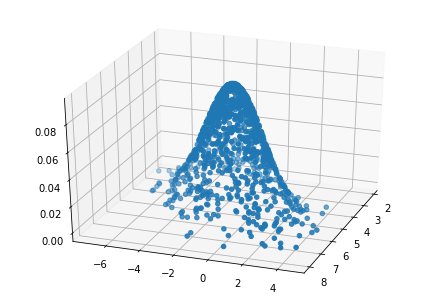

In [15]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
# 查看燃烧期后的采样样本是否符合平稳分布
ax.scatter(x_res[10000:], y_res[10000:], z_res[10000:], marker='o')
plt.show()